# Project Planning

Alex Zhang (38154290) Team 18 Section 003

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
players <- read_csv("https://raw.githubusercontent.com/Alexjhz07/DSCI-100-Project-Individual/refs/heads/main/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/Alexjhz07/DSCI-100-Project-Individual/refs/heads/main/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# (1) Data Description:

The `players.csv` dataset contains `196` rows and `7` columns the following properties:

Column Name | Data Type | Has NA | Variable Description |
- | -| - | - |
experience|chr|NO|Self-reported level of experience with the game<br>5 possible values are `Pro`, `Veteran`, `Amateur`, `Regular`, `Beginner`
subscribe|lgl|NO|Boolean for whether the player has subscribed to the game-related newsletter<br>Either `TRUE` or `FALSE`, with `144` players subscribed (`TRUE`) and `52` players not subscribed (`FALSE`)
hashedEmail|chr|NO|Hash of the email the player used for registration<br>(Hash for privacy, still usable for identifying which rows correspond to which sessions)
played_hours|dbl|NO|Number of hours played by the player on the server<br>Ranges from `0` to `223.10` hours, the mean is `5.85` hours and median is `0.10` hours
name|chr|NO|Name (Not username) of the player
gender|chr|NO|Gender identity of the player<br>7 possible values are `Male`, `Female`, `Non-binary`, `Prefer not to say`, `Agender`, `Two-Spirited`, `Other` 
Age|dbl|YES|Age of the player<br>Ranges from `9` to `58`, the mean is `21.14` and median is `19`. There are 2 `NA` values

Each row in `players.csv` represents information for a single player, like their age, name, and play time on the server. There are issues with some self-reported columns regarding whether the person is being truthful with their information (For example, their age), whether each person has only one account in this dataset (What if multiple accounts belong to the same person), and issues where some columns have NA like Age.

We also see that the median playtime is `0.10` hours, which means that the majority of players might not have even spent 1 hour on the server. This may mean that most of the session data we see after come from a select few players.

We can check these facts using the following code:

In [75]:
# CODE FOR CHECKING PLAYERS.CSV
head(players, n = 2) # Get first 2 rows
dim(players) # Get the table dimensions

# Check each column for NA
player_na_checker <- c(any(is.na(players$experience))) |>
    c(any(is.na(players$subscribe))) |>
    c(any(is.na(players$hashedEmail))) |>
    c(any(is.na(players$played_hours))) |>
    c(any(is.na(players$name))) |>
    c(any(is.na(players$gender))) |>
    c(any(is.na(players$Age)))
player_na_checker

# Check what the unqiue values of each relevant factor type column has
unique_experience <- unique(players$experience)
unique_experience
unique_gender <- unique(players$gender)
unique_gender

# Get summary statistics
summary(players, na.rm=TRUE)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17


[1] 196   7

[1] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE

[1] "Pro"      "Veteran"  "Amateur"  "Regular"  "Beginner"

[1] "Male"              "Female"            "Non-binary"       
[4] "Prefer not to say" "Agender"           "Two-Spirited"     
[7] "Other"

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

The `sessions.csv` can be checked in a similar manner as we did above. It contains `1535` rows with `5` columns having the following properties:

Column Name | Data Type | Has NA | Variable Description |
- | -| - | - |
hashedEmail|chr|NO|Same as above, Hash of the email the player used for registration<br>(Hash for privacy, still usable for identifying which rows correspond to which players)
start_time|chr|NO|The start time of a session in the form of a human readable date string
end_time|chr|YES|The end time of a session in the form of a human readable date string<br>Note that some rows may have a null entry here (They have a start time but no end time)
original_start_time|dbl|NO|Same as start_time, except as a UNIX timestamp<br>Summary stats will not make sense for this as it is a timestamp
original_end_time|dbl|YES|Same as end_time, except as a UNIX timestamp<br>Note that some rows may have a null entry here (They have a start time but no end time)<br>Summary stats will not make sense for this as it is a timestamp

Each row in `sessions.csv` corresponds to a single game session for a player with an email address. It simply records when the session started and when it ended. Every row has a start time, but some rows do not have an end time which is problematic as we don't know how long the session was.

In [35]:
# CODE FOR CHECKING SESSIONS.CSV
head(sessions, n = 2) # Check first two rows
dim(sessions) # Get dimensions

# Check NA
sessions_na_checker <- c(any(is.na(sessions$hashedEmail))) |>
    c(any(is.na(sessions$start_time))) |>
    c(any(is.na(sessions$end_time))) |>
    c(any(is.na(sessions$original_start_time))) |>
    c(any(is.na(sessions$original_end_time)))
sessions_na_checker

# Get summary statistics
summary(sessions, na.rm=TRUE)

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12


[1] 1535    5

[1] FALSE FALSE  TRUE FALSE  TRUE

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

# (2) Question:

I choose to answer the first provided question:

> Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Rephrased, I ask the following: "Can the player's Age, Experience, and Gender predict whether or not they will subscribe to the game-related newsletter?"

The data in `players.csv` already contain all 3 explanatory variables and the 1 response variable. We use this dataset to train a classification model capable of predicting whether someone is subscribed to the newsletter based on the 3 explanatory variables. No further wrangling is required as the table already contains everything needed and is in a tidy format.

# (3) Exploratory Data Analysis and Visualization

The dataset has already been loaded into the `players` variable at the start of this file. We do not need to do any extra wrangling either to make the data tidy as it already follows the 3 rules of a tidy dataset. The mean values of the quantitative variables were already recorded in section 1, but I will repeat them here for the convenience of the reader:

Quantitative Column | Mean | Variable Description
- | -| - |
played_hours|`5.85`|Number of hours played by the player on the server<br>Ranges from `0` to `223.10` hours, the mean is `5.85` hours and median is `0.10` hours
Age|`21.14`|Age of the player<br>Ranges from `9` to `58`, the mean is `21.14` and median is `19`. There are 2 `NA` values

We will make some graphs to explore this data:

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


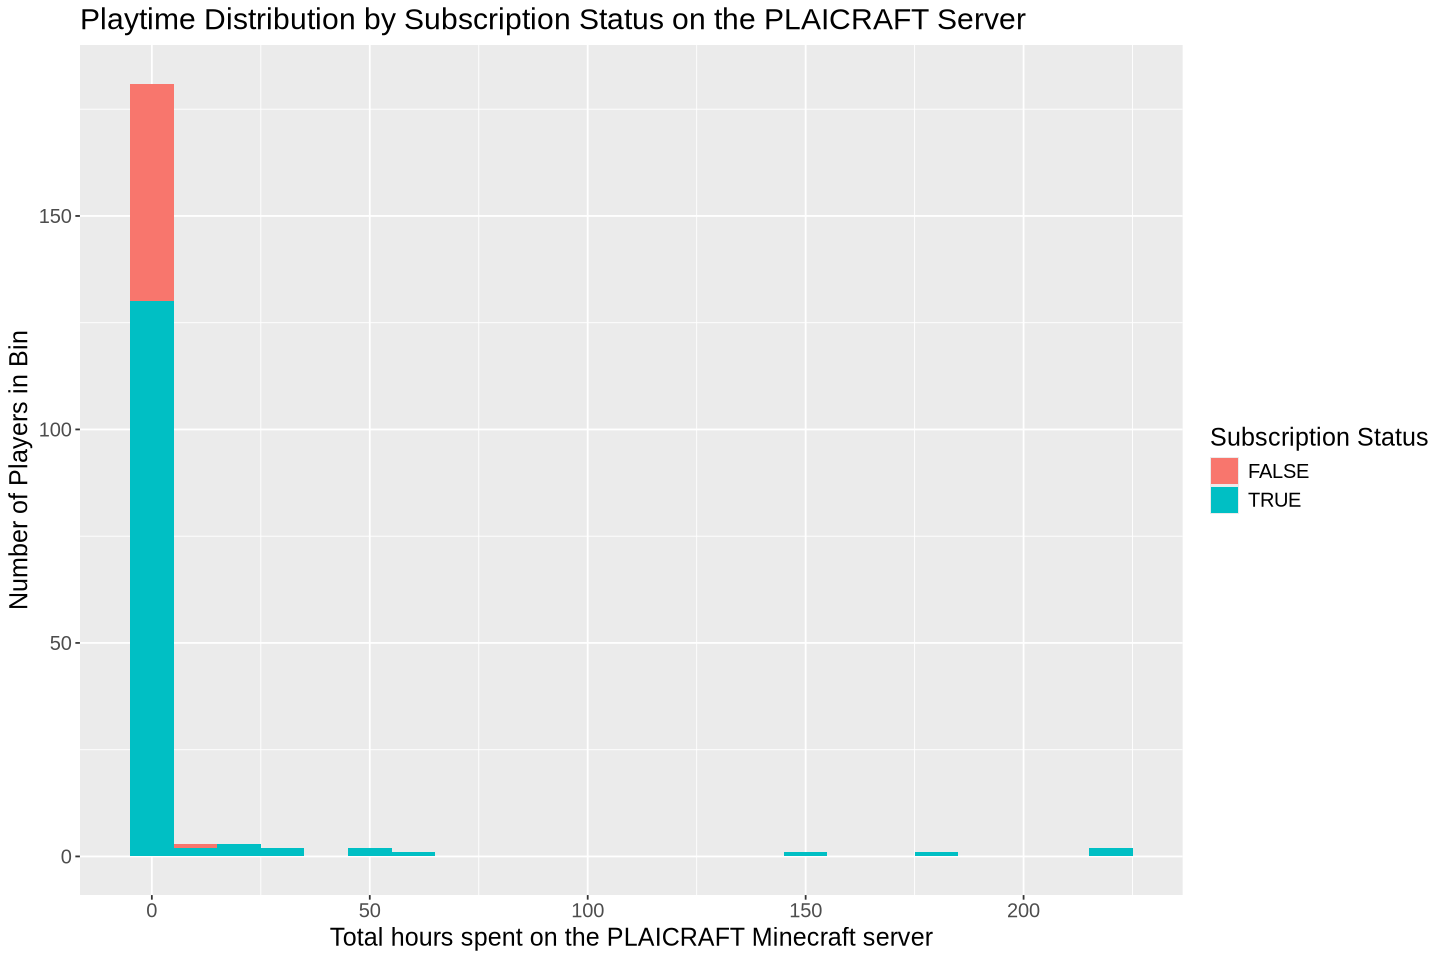

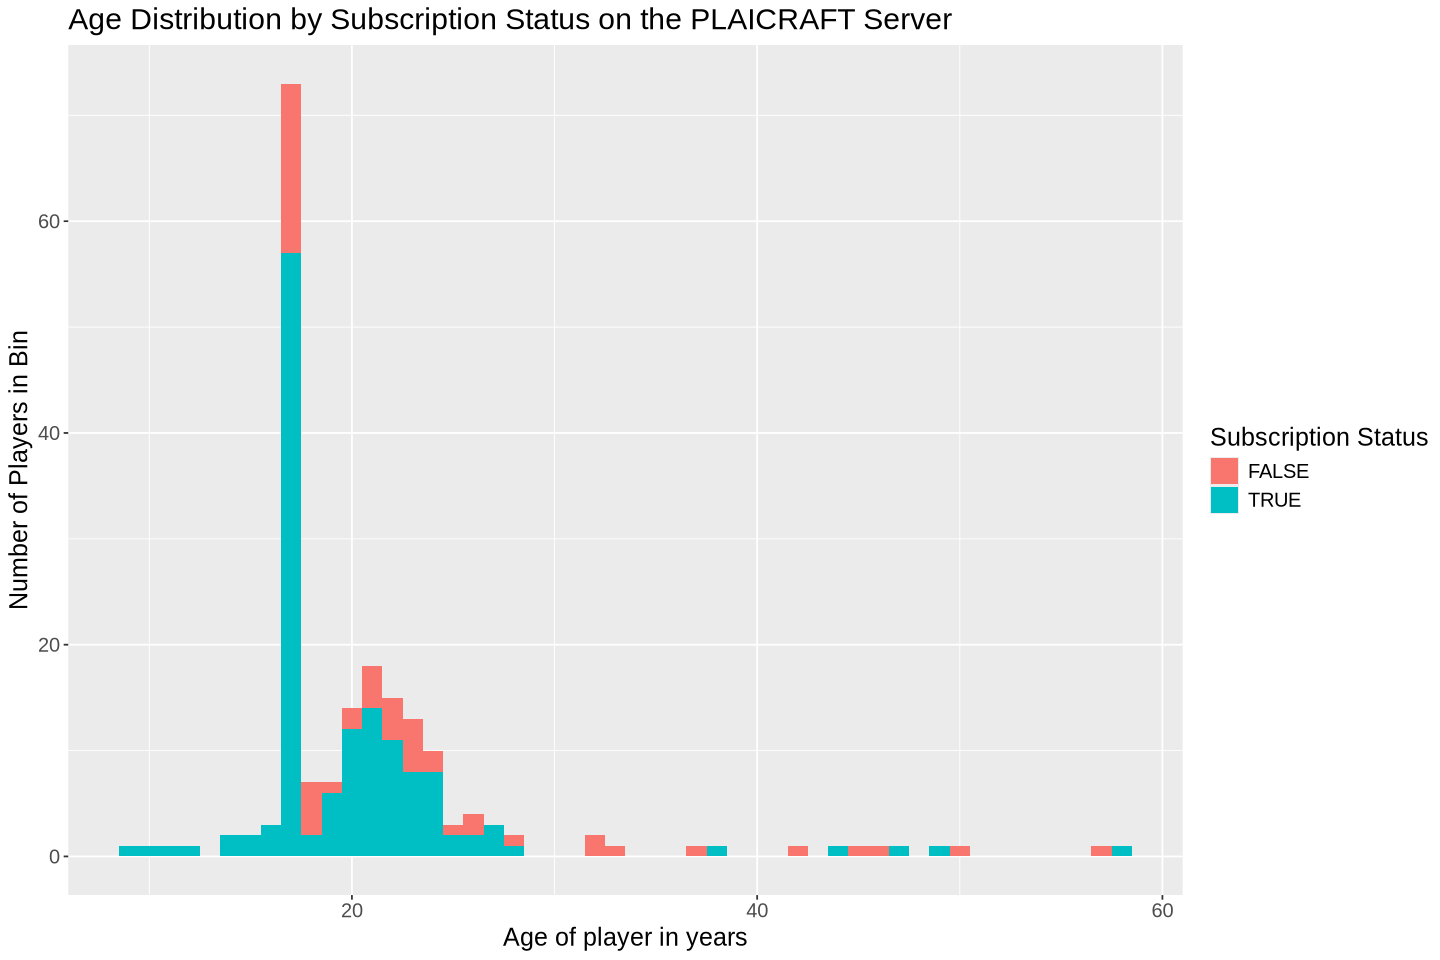

In [74]:
options(repr.plot.height = 8, repr.plot.width = 12)

player_hours_plot <- ggplot(players, aes(x=played_hours, fill=subscribe)) +
    geom_histogram(binwidth=10) +
    labs(x="Total hours spent on the PLAICRAFT Minecraft server", 
         y="Number of Players in Bin", 
         title="Playtime Distribution by Subscription Status on the PLAICRAFT Server",
        fill="Subscription Status") +
    theme(text = element_text(size = 15))
    
player_age_plot <- ggplot(players, aes(x=Age, fill=subscribe)) +
    geom_histogram(binwidth=1) +
    labs(x="Age of player in years", 
         y="Number of Players in Bin", 
         title="Age Distribution by Subscription Status on the PLAICRAFT Server",
        fill="Subscription Status") +
    theme(text = element_text(size = 15))

player_hours_plot
player_age_plot

The vast majority of players have `10` hours or less on the server, while a few players have well over `50` hours of play time.  
This may mean that there are many "casual" players in the server or people who just played once and dropped it after.

Subscribed players dominate the dataset as most players are subscribed, making up `144/196` players (Section 1 contains the code)

A large chunk of players (`73`) are also aged `17`, more than the next 3 most populous age groups combined.

Issues we might run into include not having enough data for older players, not having enough data from players who spend a long time playing, and the fact that there are more subscribed players than those who are not.

In [86]:
# Code for getting the most common age groups
common_age <- players |>
    group_by(Age) |>
    summarize(Count = n()) |>
    arrange(desc(Count))

head(common_age, n = 4)

Age,Count
<dbl>,<int>
17,73
21,18
22,15
20,14


# (4) Methods and Plan